In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [4]:
N_W = 1001
start = 0
end = 3000000
expand_fac = 5

In [4]:
evenly_spaced_grid = np.linspace(0, 1, N_W)


In [5]:
expand_grid = start + (end - start)*evenly_spaced_grid**expand_fac

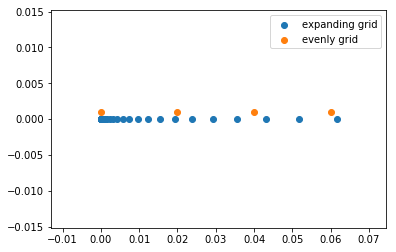

In [76]:
y = np.zeros(N_W)
plt.scatter(expand_grid[:30], y[:30])
plt.scatter([0, 0.02, 0.04, 0.06], [0.001, 0.001, 0.001, 0.001])
plt.legend(['expanding grid', 'evenly grid'])
plt.show()

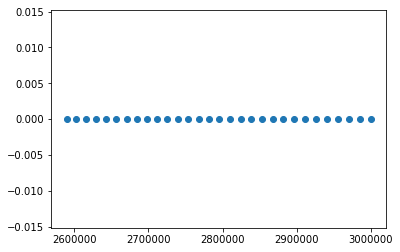

In [27]:
plt.scatter(expand_grid[-30:], y[-30:])
plt.show()

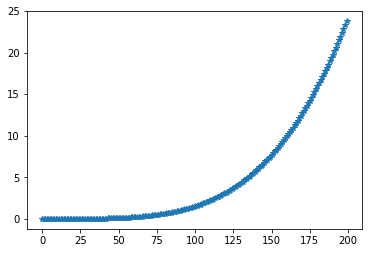

In [34]:
plt.plot(np.diff(expand_grid)[:200], '*')
plt.show()

## Graph of consumption function

### For Baseline Case

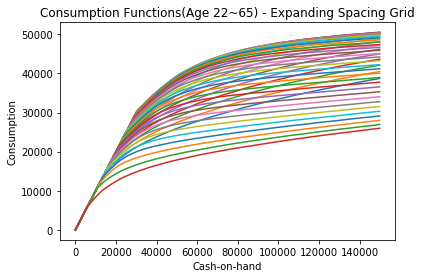

In [7]:
base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
c_func_fp = os.path.join(base_path, 'results', 'Iteration_2.xlsx')
c_df = pd.read_excel(c_func_fp)

end = 15000000/100
grid_w = np.arange(1, end, 100)
for age in range(22, 66):
    spline = CubicSpline(c_df[str(100)], c_df[str(age)], bc_type='natural')
    c = spline(grid_w)
    plt.plot(grid_w, c, label=str(age))
plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

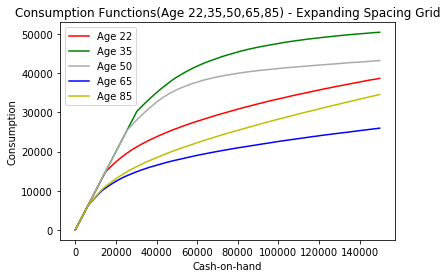

In [8]:
spline = CubicSpline(c_df[str(100)], c_df['22'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='r', label='Age 22')

spline = CubicSpline(c_df[str(100)], c_df['35'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='g', label='Age 35')

spline = CubicSpline(c_df[str(100)], c_df['50'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='darkgrey', label='Age 50')

spline = CubicSpline(c_df[str(100)], c_df['65'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='b', label='Age 65')

spline = CubicSpline(c_df[str(100)], c_df['85'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()

### For Standard File name

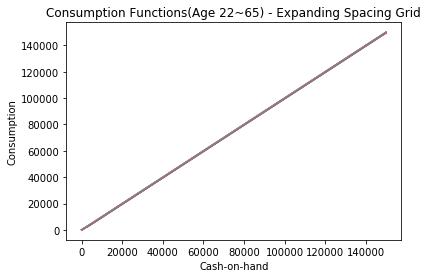

In [49]:
base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
c_func_fp = os.path.join(base_path, 'results', 'c function_BSL_6.0.xlsx')
c_df = pd.read_excel(c_func_fp)

end = 15000000 / 100
grid_w = np.arange(1, end, 100)
for age in range(55, 63):
    spline = CubicSpline(c_df[str(100)], c_df[str(age)], bc_type='natural')
    c = spline(grid_w)
    plt.plot(grid_w, c, label=str(age))
plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

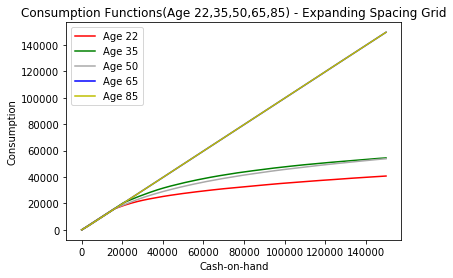

In [38]:
grid_w = np.arange(1, end, 100)

spline = CubicSpline(c_df[str(100)], c_df['22'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='r', label='Age 22')

spline = CubicSpline(c_df[str(100)], c_df['35'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='g', label='Age 35')

spline = CubicSpline(c_df[str(100)], c_df['50'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='darkgrey', label='Age 50')

spline = CubicSpline(c_df[str(100)], c_df['65'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='b', label='Age 65')

spline = CubicSpline(c_df[str(100)], c_df['85'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()

In [73]:
def utility(values, gamma):
    return values**(1-gamma) / (1-gamma)

In [74]:
gamma = 2

In [75]:
c = np.arange(4, 1000, 2).astype(float)
u = utility(c, gamma)


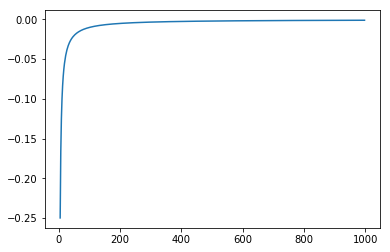

In [76]:
plt.plot(c, u)
plt.show()

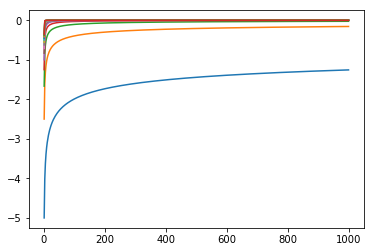

In [114]:
c = np.arange(1, 1000, 2).astype(float)
for gamma in np.arange(1.2, 4, 0.2):
    u = utility(c, gamma)
    plt.plot(c, u)

plt.show()
